# Task - 5: To explore Business Analytics
## The task is to perform Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

We need to find different insights from the dataset like  finding out the weak areas where you can work to make more profit.

The Dataset is available in my Github repository or you can get it from the link given below

Dataset: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view


# Import Libraries needed 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Export Data

In [3]:
data = pd.read_csv("D:\The Sparks Foundation\SampleSuperstore.csv")

In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Find if there are any null values

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Information of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


From the data we can see that Sales, Quantity, Discount, Profit, postal code are the types of int or float. And the remaining data is of object type. We can get the insights of the data using these int or float type of data.

# Visualize the Data

## Which Shipping Mode is mostly used for deliveries?

Text(0, 0.5, 'Number of orders')

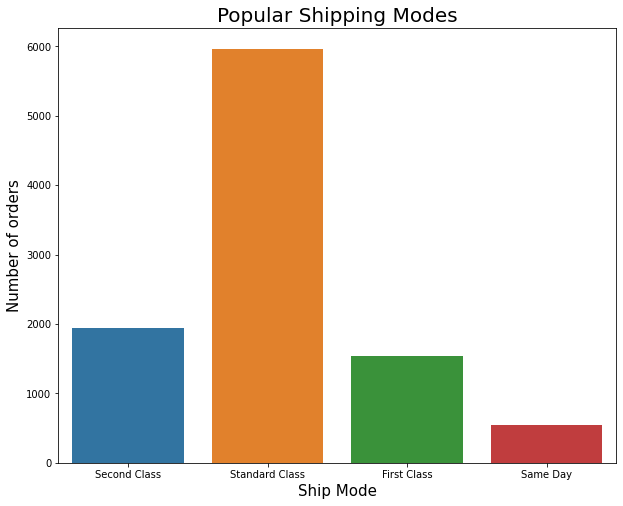

In [59]:
plt.figure(figsize = (10,8))

sns.countplot(data['Ship Mode'])

plt.title("Popular Shipping Modes",size = 20)
plt.xlabel("Ship Mode",size = 15)
plt.ylabel("Number of orders",size = 15)

According the graph above "Standard Class" shipping mode is mostly preferred for the order deliveries and "Same Day" shipping mode is leastly preferred.

## Segments of each Shipping Mode

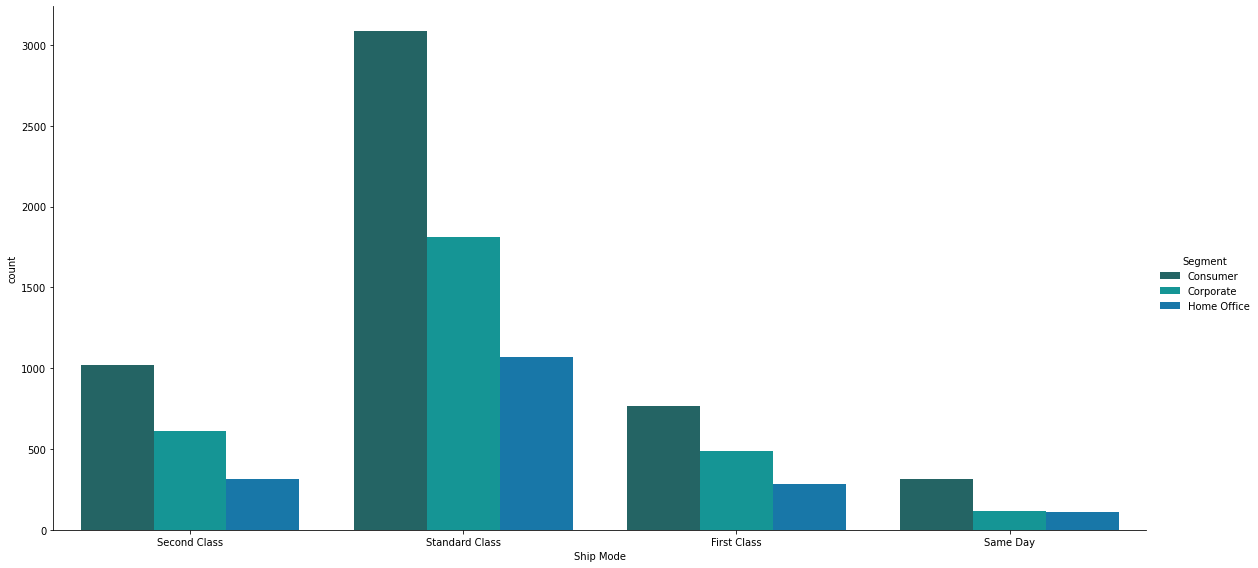

In [171]:
sns.catplot('Ship Mode', hue = 'Segment',data = data, kind='count',palette='winter_d',aspect=2,height=8)

As we already know mostly preferred shipping mode is "Standard Class". In each Shipping mode the mostly ordered segment of customers are "Consumers" and least ordered segment of customers are "Home Office".

## Quantity Ordered by each Segment

In [10]:
qua_ord_seg = data.groupby('Segment')['Quantity'].sum().reset_index()
qua_ord_seg

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


Text(0.5, 1.0, 'Quantity Ordered by each segment')

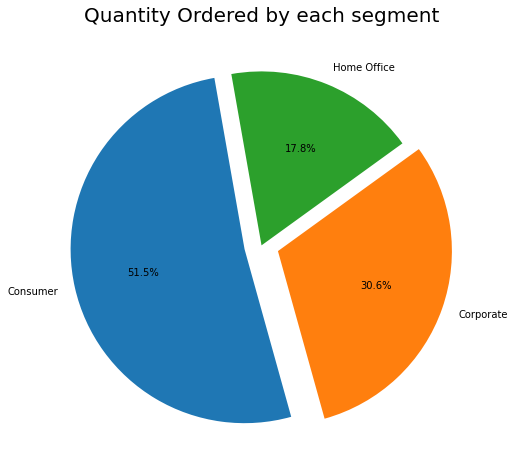

In [160]:
labels=data['Segment'].unique()
plt.figure(figsize = (10,8))
plt.pie(qua_ord_seg['Quantity'], autopct = "%1.1f%%", labels = labels, explode = (0.1,0.1,0), startangle = 100)
plt.title("Quantity Ordered by each segment",size=20)

## Number of orders by each State

Text(0.5, 6.799999999999997, 'State')

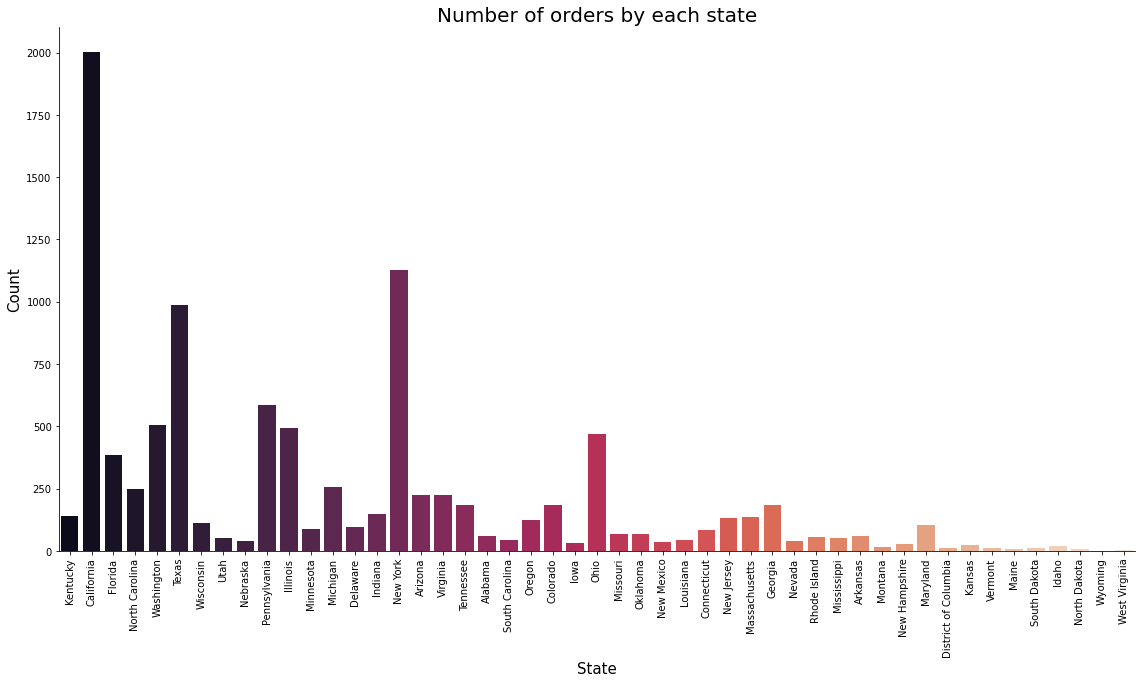

In [172]:
sns.catplot('State', data = data, kind = 'count', palette = 'rocket', aspect = 2, height = 8)
plt.xticks(rotation=90)
plt.title("Number of orders by each state", size = 20)
plt.ylabel('Count', size = 15)
plt.xlabel('State', size = 15)

As per the graph the most number of orders are by the "California" state which is around 2000.

## Quantity ordered by each state

In [30]:
state_qua = data.groupby('State')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

In [31]:
state_qua.head(10)

,State,Quantity
3,California,7667
30,New York,4224
41,Texas,3724
36,Pennsylvania,2153
45,Washington,1883
11,Illinois,1845
33,Ohio,1759
8,Florida,1379
31,North Carolina,983
20,Michigan,946


#### Graph for Highest Quantity Ordered States

Text(0.5, 1.0, 'Quantity ordered by top 10 states')

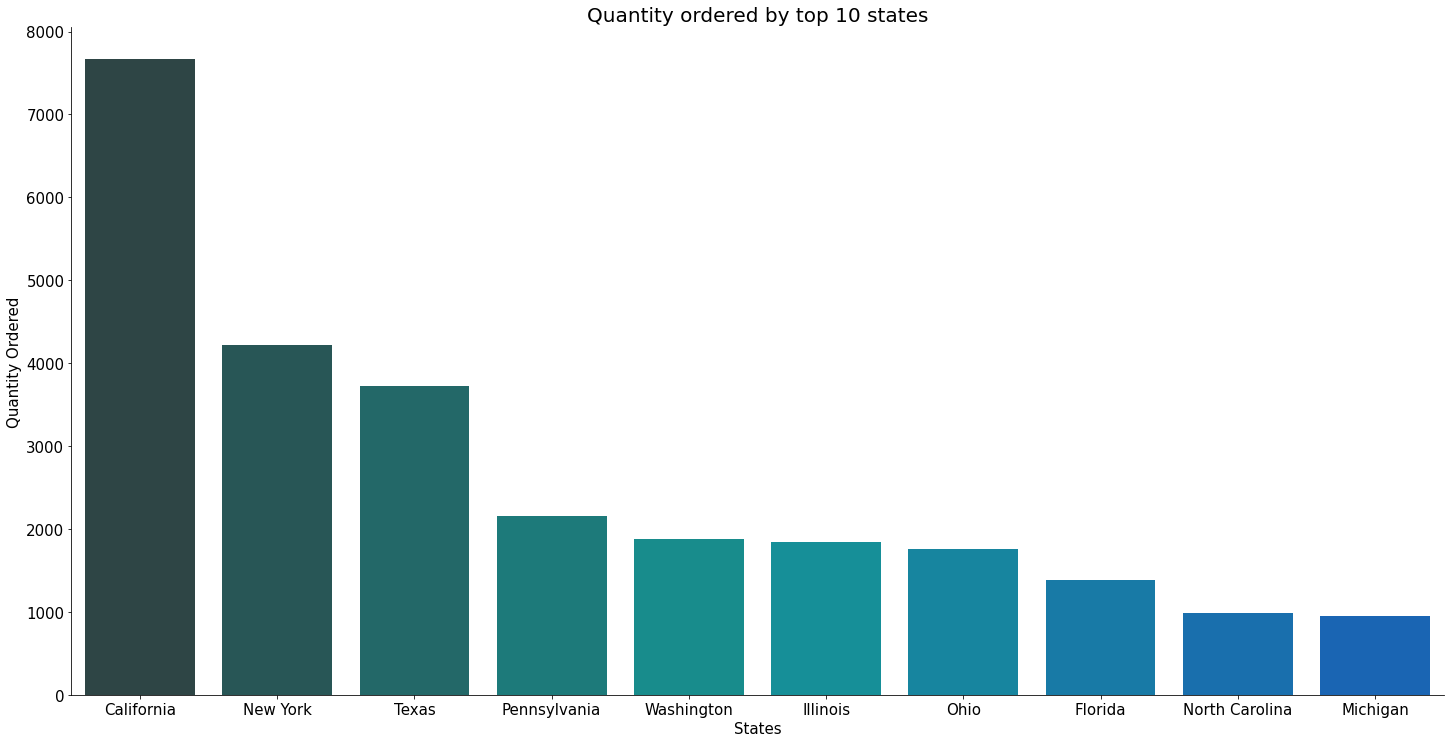

In [163]:
sns.catplot('State','Quantity',data=state_qua.head(10),kind='bar',height=10,aspect=2,palette='winter_d')
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('States',size=15)
plt.ylabel('Quantity Ordered',size=15)
plt.title("Quantity ordered by top 10 states",size=20)

The highest number of quantity is delivered to the "California" state and the top 10 cities with high number of quantity ordered by states is plotted above.

#### Graph for Least Quantity Ordered States 

Text(0.5, 1.0, 'Quantity ordered by least 10 states')

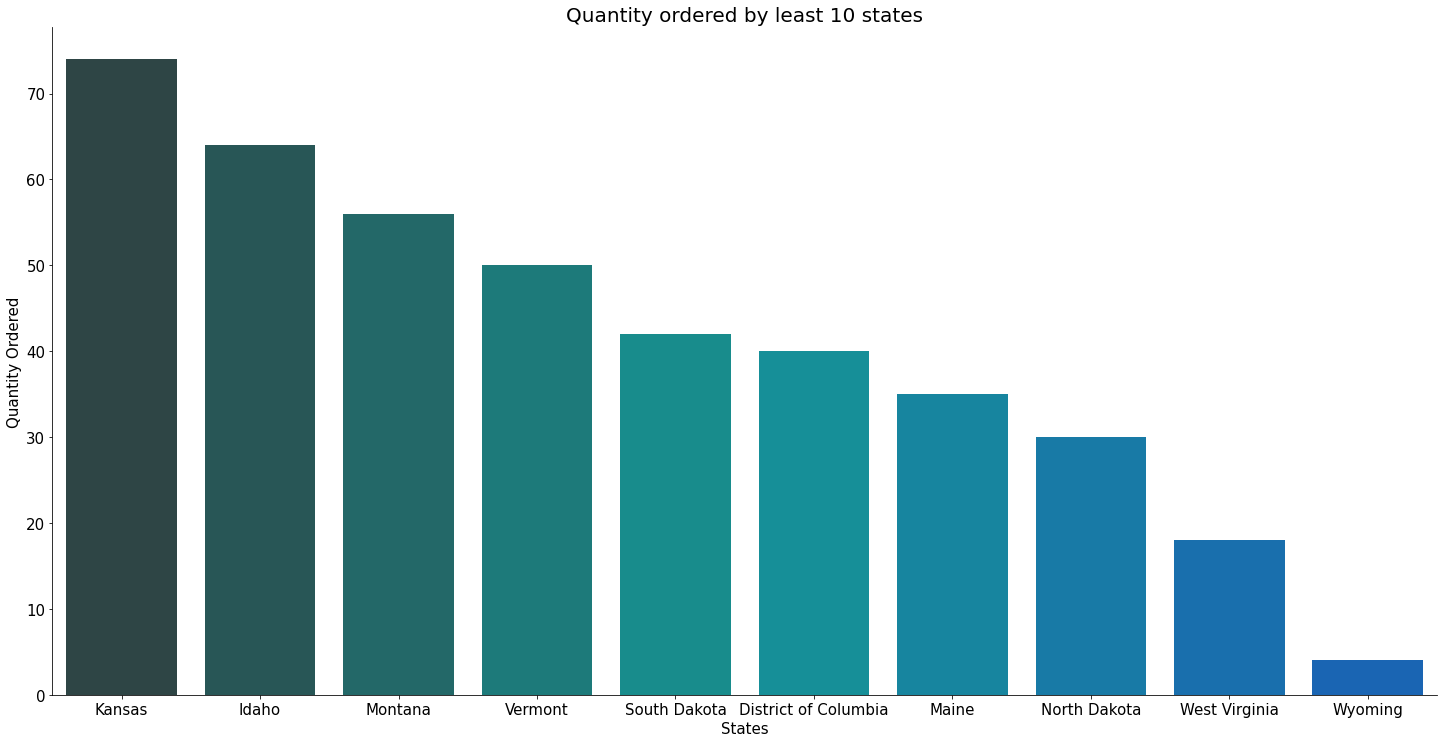

In [175]:
sns.catplot('State','Quantity',data=state_qua.tail(10),kind='bar',height=10,aspect=2,palette='winter_d')
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('States',size=15)
plt.ylabel('Quantity Ordered',size=15)
plt.title("Quantity ordered by least 10 states",size=20)

The least quantity ordered by Wyoming state.

## Quantity ordered by each city

In [33]:
city_qua = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

In [35]:
city_qua.head(10)

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
207,Houston,1466
80,Chicago,1132
94,Columbus,836
437,San Diego,670
464,Springfield,649


Text(0.5, 1.0, 'Quantity ordered by top 10 cities')

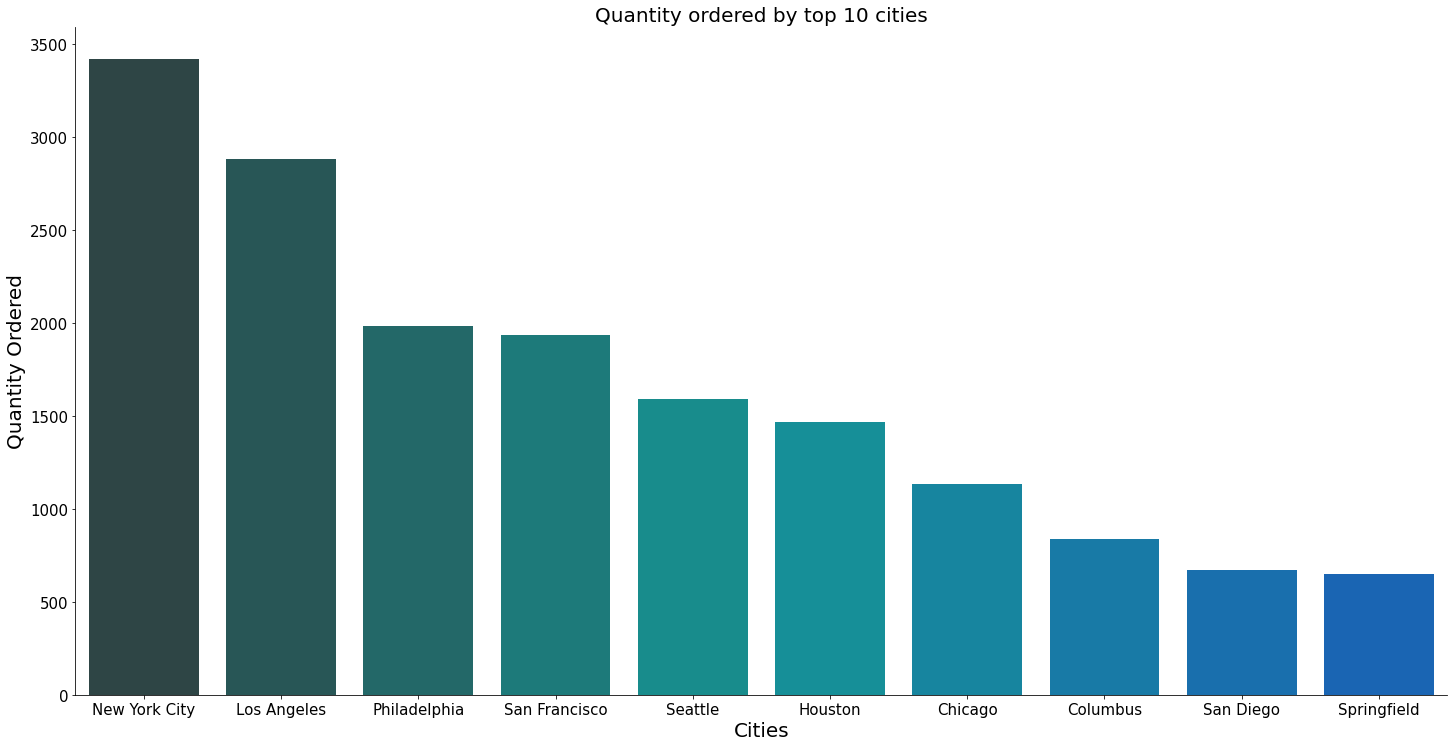

In [164]:
sns.catplot('City','Quantity',data=city_qua.head(10),kind='bar',height=10,aspect=2,palette='winter_d')
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('Cities',size=20)
plt.ylabel('Quantity Ordered',size=20)
plt.title("Quantity ordered by top 10 cities",size=20)

As per the graph the highest Quantity is ordered by the "New York City"

## Quantity ordered by each region

In [37]:
reg_qua = data.groupby('Region')['Quantity'].sum().reset_index()
reg_qua

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


Text(0.5, 1.0, 'Quantity Ordered by each region')

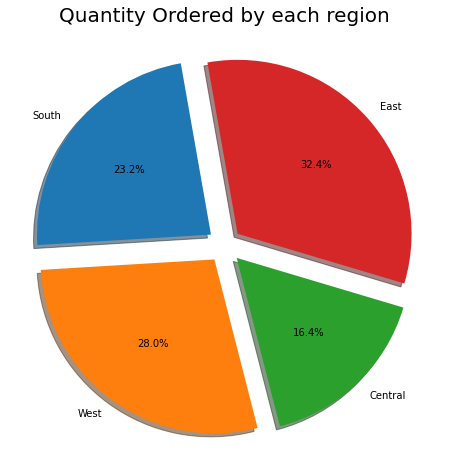

In [38]:
labels = data['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(reg_qua['Quantity'],autopct="%1.1f%%",labels=labels,explode=(0.1,0.1,0.1,0.1),shadow=True,startangle=100)
plt.title("Quantity Ordered by each region",size=20)

As we see from the graph East Region has ordered the highest quantity

## Quantity ordered by each Category

In [39]:
cat_qua = data.groupby('Category')['Quantity'].sum().reset_index()
cat_qua

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Quantity ordered by each category')

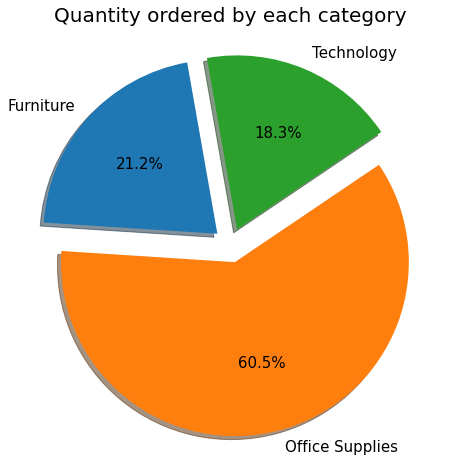

In [168]:
labels = data['Category'].unique()
plt.figure(figsize=(10,8))
plt.pie(cat_qua['Quantity'], autopct="%1.1f%%",labels = labels, 
        explode = (0.1,0.1,0.1), shadow=True, startangle=100, textprops={'fontsize': 15})
plt.title('Quantity ordered by each category',size=20)

From the graph we can say that the highest quantity is ordered by Office Supplies category which is 60.5% and Technology Category is 18.3% and Furniture Category is 21.2%.

Now let us see about the sales of each sub-category.

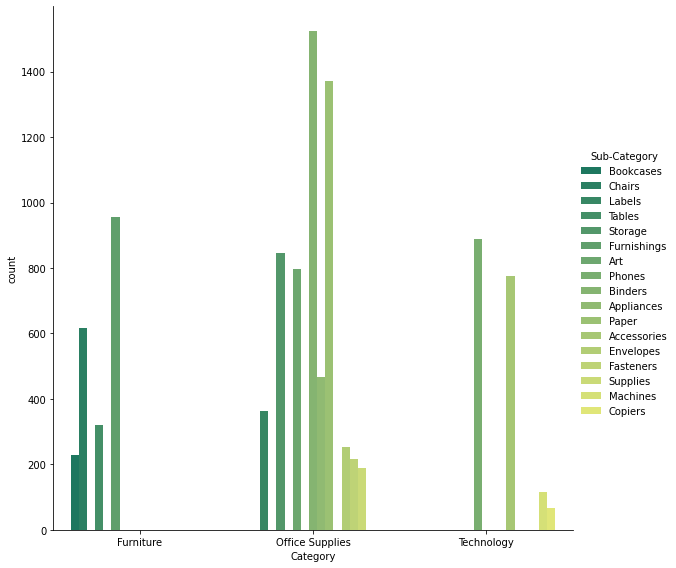

In [174]:
sns.catplot('Category', hue = 'Sub-Category',data = data, kind='count',palette='summer',aspect=1,height=8)

Pie chart representation of how much percentage of a sub-category in a category

In [42]:
exp = data.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index()
exp

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,868
1,Furniture,Chairs,2356
2,Furniture,Furnishings,3563
3,Furniture,Tables,1241
4,Office Supplies,Appliances,1729
5,Office Supplies,Art,3000
6,Office Supplies,Binders,5974
7,Office Supplies,Envelopes,906
8,Office Supplies,Fasteners,914
9,Office Supplies,Labels,1400


Categories and Sub-Categories


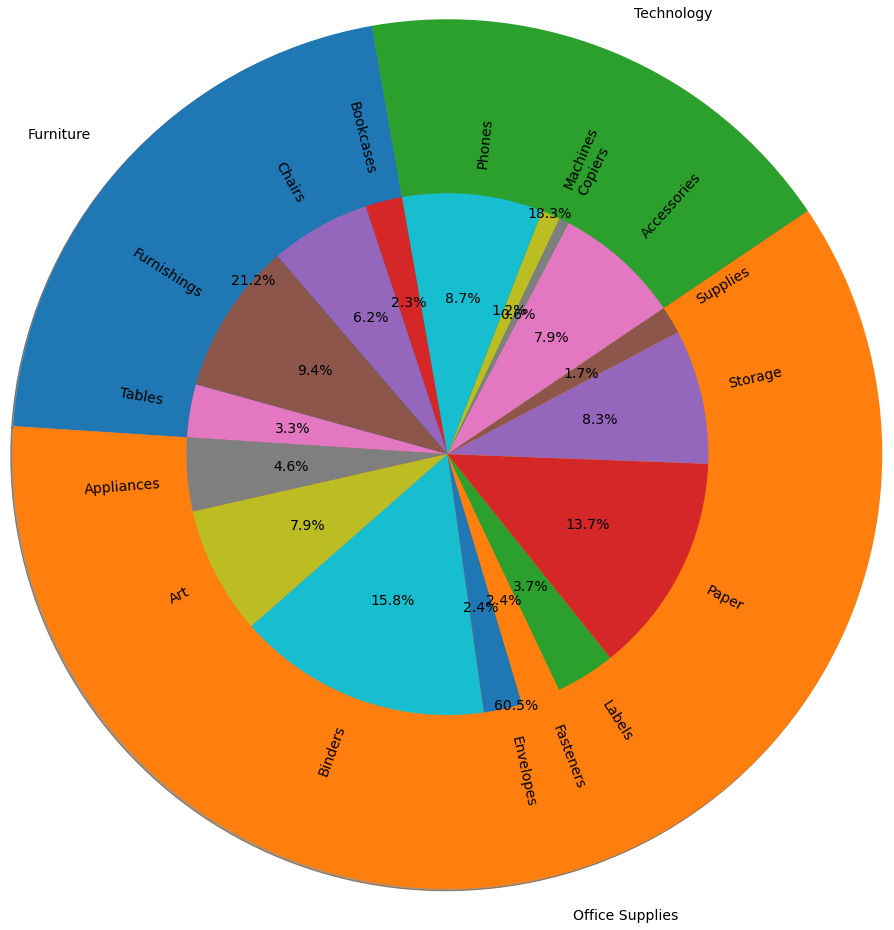

In [187]:
fig, bx = plt.subplots()

labels = exp['Category'].unique()

bx.pie((exp.groupby('Category')['Quantity'].sum().reset_index())['Quantity'],autopct="%1.1f%%",
       labels = labels, shadow=True, startangle=100, radius = 5,textprops={'fontsize': 14})

labels1 = exp['Sub-Category'].unique()

bx.pie(exp['Quantity'],autopct="%0.1f%%",labels = labels1,startangle=100,radius = 3,
       rotatelabels = True,textprops={'fontsize': 14})
print("Categories and Sub-Categories")

## Compare Sales and Profits of Category 

In [109]:
sal_pro_cat = data.groupby('Category')[['Sales','Profit']].sum()
sal_pro_cat

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


Text(0.5, 1.0, 'Sales and profit comparision between Categories')

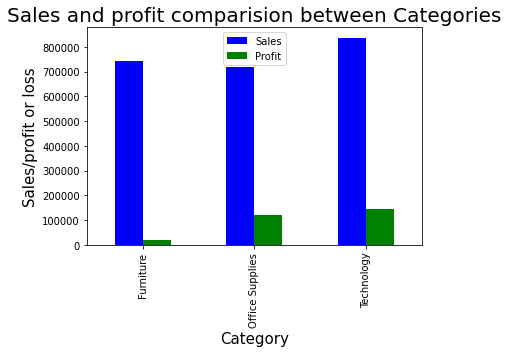

In [159]:
sal_pro_cat.plot(kind = "bar",color = ["b","g"])
plt.xlabel('Category',size = 15)
plt.ylabel('Sales/profit or loss',size = 15)
plt.title("Sales and profit comparision between Categories",size = 20)

## Compare Sales and Profits of Sub-Category

In [105]:
sal_pro_subc = data.groupby('Sub-Category')[['Sales','Profit']].sum()
sal_pro_subc

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


Text(0.5, 1.0, 'Sales and profit comparision between Sub-Categories')

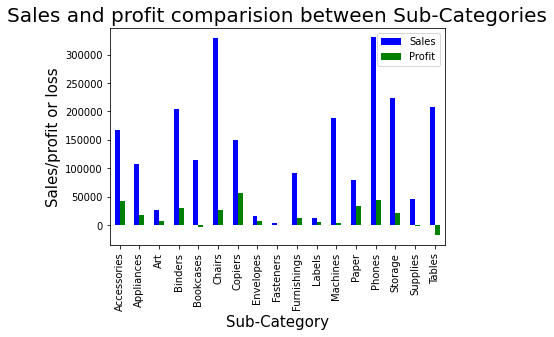

In [157]:
sal_pro_subc.plot(kind = "bar",color = ["b","g"])
plt.xlabel('Sub-Category',size = 15)
plt.ylabel('Sales/profit or loss',size = 15)
plt.title("Sales and profit comparision between Sub-Categories",size=20)

## Compare Sales and Profits of States

In [115]:
sal_pro_s = data.groupby('State')[['Sales','Profit']].sum().sort_values(by = "Profit", ascending = False)
sal_pro_s.head(10)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
Indiana,53555.3600,18382.9363
Georgia,49095.8400,16250.0433
Kentucky,36591.7500,11199.6966
Minnesota,29863.1500,10823.1874


Text(0.5, 1.0, 'Sales and profit comparision between states for 25-end')

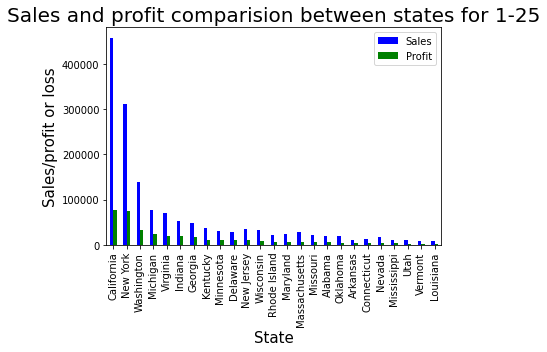

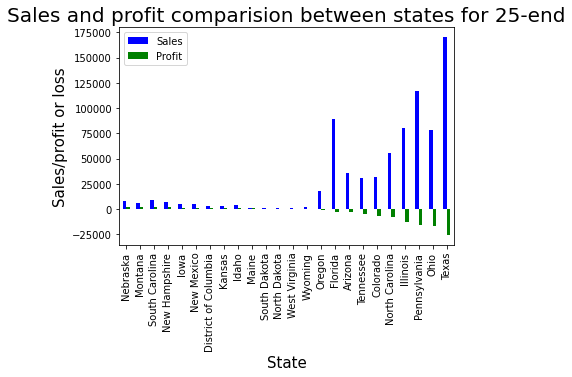

In [117]:
sal_pro_s[:25].plot(kind = "bar",color = ["b","g"])
plt.xlabel('State',size = 15)
plt.ylabel('Sales/profit or loss',size = 15)
plt.xticks(rotation = 90)
plt.title('Sales and profit comparision between states for 1-25',size = 20)


sal_pro_s[25:].plot(kind = "bar",color = ["b","g"])
plt.xlabel('State',size = 15)
plt.ylabel('Sales/profit or loss',size = 15)
plt.xticks(rotation = 90)
plt.title('Sales and profit comparision between states for 25-end',size = 20)

# Profits

###  Region wise Profits

In [44]:
# Region
pr = data.groupby('Region')['Profit'].sum().reset_index()
pr

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


Text(0.5, 1.0, 'Region Wise Profits')

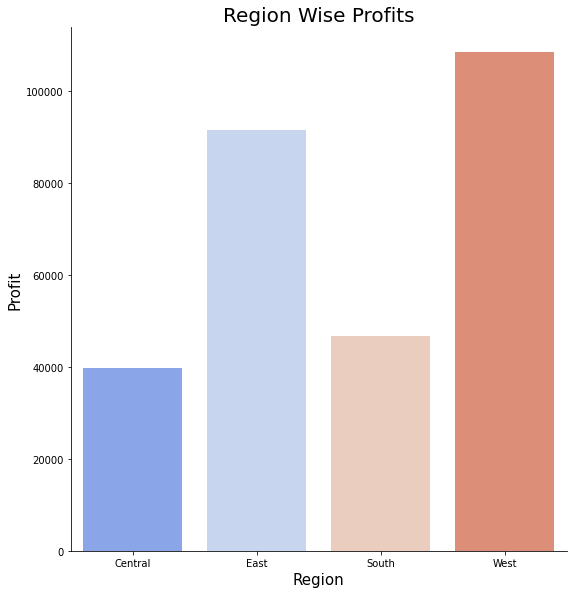

In [178]:
sns.catplot('Region', 'Profit', data = pr,kind='bar',height=8,aspect=1,palette='coolwarm')
plt.xlabel('Region',size=15)
plt.ylabel('Profit',size=15)
plt.title("Region Wise Profits",size=20)

As we can see in the graph the West Region will give the highest profit. And the Central region gives the less profit.

### Category Wise Profits 

In [46]:
# Category
pc = data.groupby('Category')['Profit'].sum().reset_index()
pc

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Category Wise Profits')

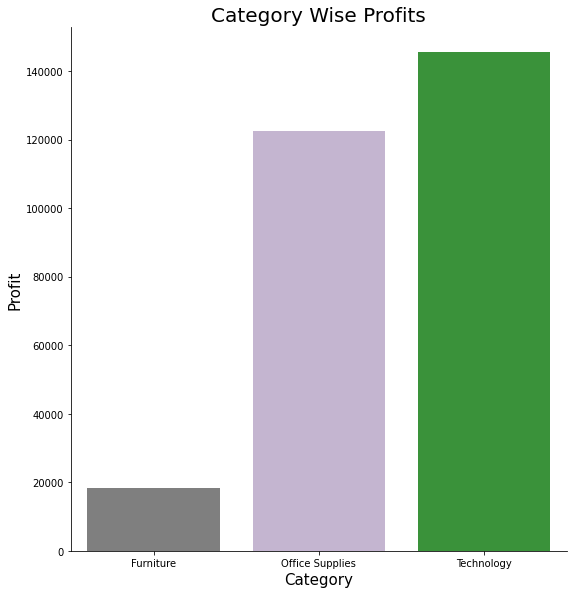

In [179]:
sns.catplot('Category', 'Profit', data = pc,kind='bar',height=8,aspect=1,palette='tab20_r')
plt.xlabel('Category',size=15)
plt.ylabel('Profit',size=15)
plt.title("Category Wise Profits",size=20)

From the graph we can say that the highest profits are from the Technology Category and the lowest profits are from the Furniture Sector.

### Segment Wise Profits

In [48]:
#segment
ps = data.groupby('Segment')['Profit'].sum().reset_index()
ps

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


Text(0.5, 1.0, 'Segment Wise Profits')

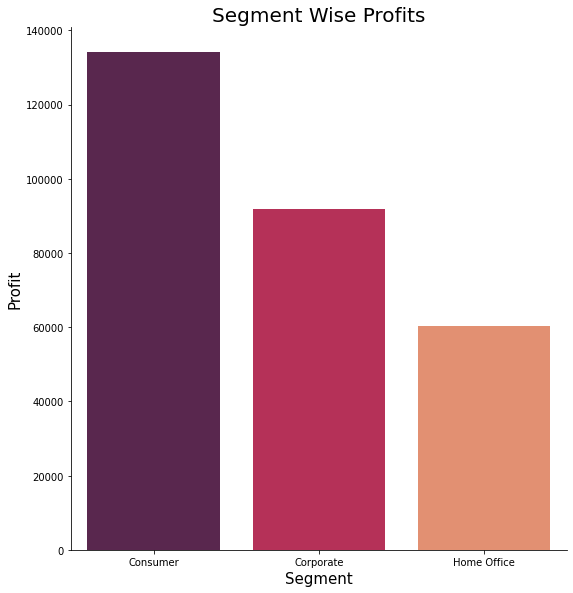

In [181]:
sns.catplot('Segment', 'Profit', data = ps,kind='bar',height=8,aspect=1,palette='rocket')
plt.xlabel('Segment',size=15)
plt.ylabel('Profit',size=15)
plt.title("Segment Wise Profits",size=20)

The Highest profits are from the Consumer segment and the lowest profits are from Home Office segment

### Ship Mode wise profits

In [50]:
#ship mode
psm = data.groupby('Ship Mode')['Profit'].sum().reset_index()
psm

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


Text(0.5, 1.0, 'Ship Mode Wise Profits')

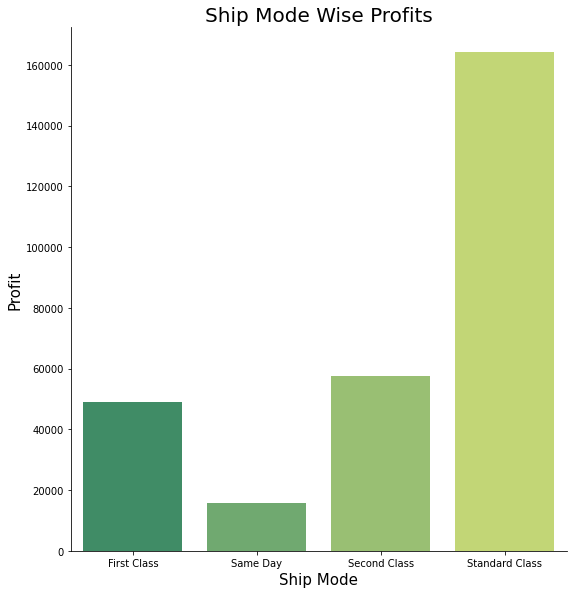

In [182]:
sns.catplot('Ship Mode', 'Profit', data = psm,kind='bar',height=8,aspect=1,palette='summer')
plt.xlabel('Ship Mode',size=15)
plt.ylabel('Profit',size=15)
plt.title("Ship Mode Wise Profits",size=20)

The highest profits are from Standard Class and the lowest profits are from Same Day Ship Mode.

### State wise Profits

In [52]:
#state
pst = data.groupby('State')['Profit'].sum().reset_index()
pst.head(10)

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


Text(0.5, 1.0, 'State Wise Profits')

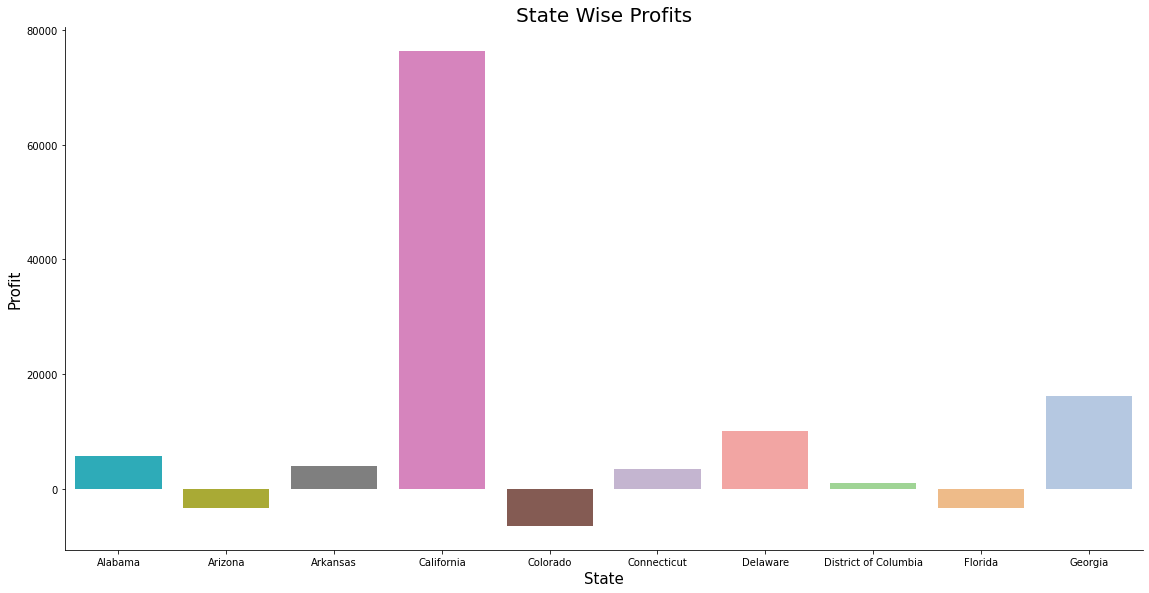

In [183]:
sns.catplot('State', 'Profit', data = pst.head(10),kind='bar',height=8,aspect=2,palette='tab20_r')
plt.xlabel('State',size=15)
plt.ylabel('Profit',size=15)
plt.title("State Wise Profits",size=20)

This is the catplot representing the profits gained from the first 10 states.

From that graph we can say that some states are falling down to losses also.

### City Wise Profits

In [57]:
#city
pct = data.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
pct.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


#### Top 10  cities having Profits

Text(0.5, 1.0, 'City Wise Profits')

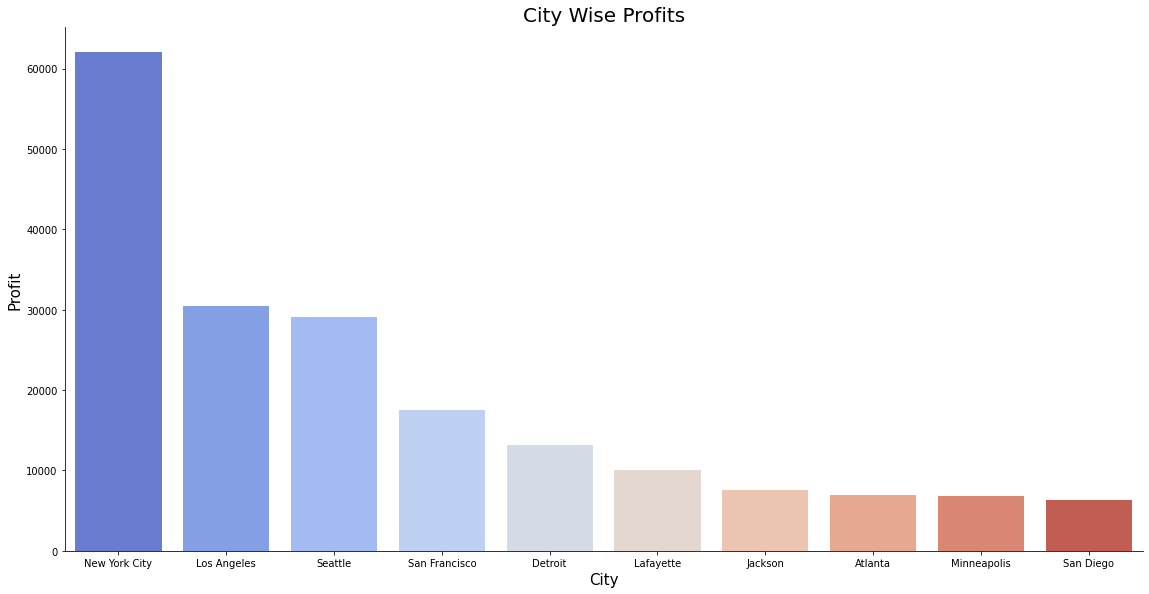

In [184]:
sns.catplot('City', 'Profit', data = pct.head(10),kind='bar',height=8,aspect=2,palette='coolwarm')
plt.xlabel('City',size=15)
plt.ylabel('Profit',size=15)
plt.title("City Wise Profits",size=20)

City with highest amount of profits is "New York City".

Last 10 cities in list of "Cities wise profits"

Text(0.5, 1.0, 'City Wise Profits')

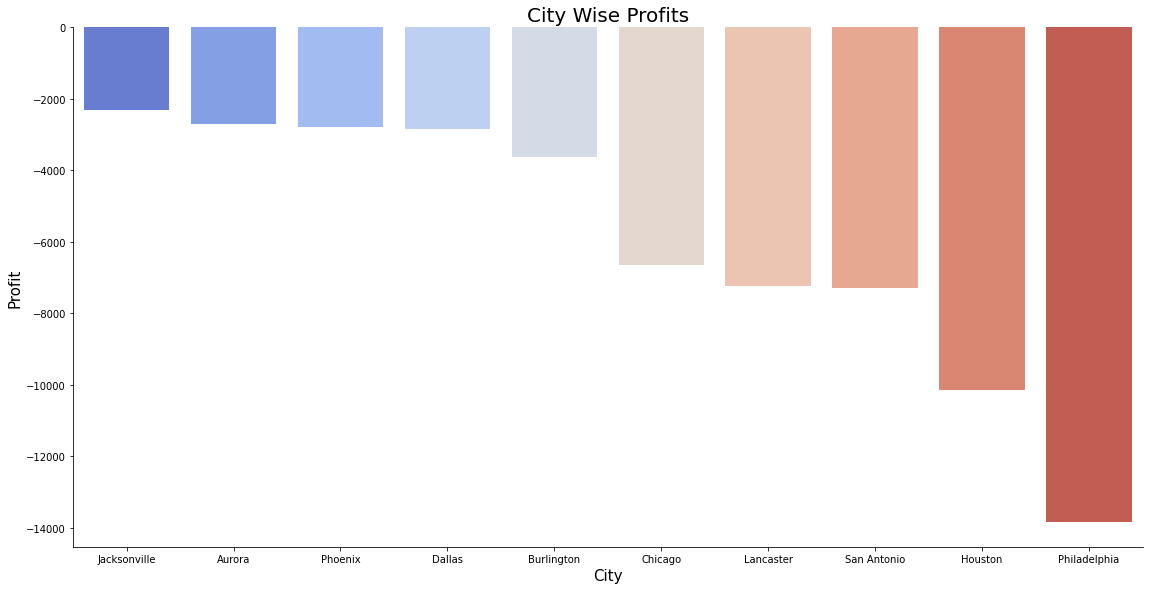

In [185]:
sns.catplot('City', 'Profit', data = pct.tail(10),kind='bar',height=8,aspect=2,palette='coolwarm')
plt.xlabel('City',size=15)
plt.ylabel('Profit',size=15)
plt.title("City Wise Profits",size=20)

As we move to the end of the data frame the cities are being end up having losses.
The city with high amount of loss is "Philadelphia".

# Insights

1) The most prefered ship mode is "Standard Class".

2) The mostly ordered segment of customers are "Consumers".

3) The most profitable Region is "East" and least is "Central".

4) The most profitable segment is "Consumer" and least is "Home Office".

5) The most profitable category is "Technology" and least is "Furniture".

6) The most profitable ship mode is "Standard class" and least is "Same day".

7) The most profitable city is "New York City" and least is "Philadelphia".

8) Companies must be more focused on the Tables, Bookcases, Supplies as they are entering into losses.

